In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('../data/features/team_features.csv')
df.head()

,date,team,opponent,team_score,opponent_score,win,neutral,avg_goals_last_5,win_rate_last_5
0,2010-01-04,Mali,Egypt,0.0,1.0,0,True,0.0,0.0
1,2010-01-06,Iran,Singapore,3.0,1.0,1,False,1.0,1.0
2,2010-01-06,Syria,China PR,0.0,0.0,0,False,6.0,1.0
3,2010-01-06,Yemen,Japan,2.0,3.0,0,False,0.0,0.0
4,2010-01-07,Ivory Coast,Rwanda,2.0,0.0,1,True,1.0,1.0


In [24]:
df["date"] = pd.to_datetime(df["date"])

In [25]:
df["win"].value_counts(normalize=True)

win
0    0.615178
1    0.384822
Name: proportion, dtype: float64

In [26]:
df["avg_goals_last_5"].describe()

count    30227.000000
mean         1.358924
std          0.838410
min          0.000000
25%          0.800000
50%          1.200000
75%          1.800000
max         19.000000
Name: avg_goals_last_5, dtype: float64

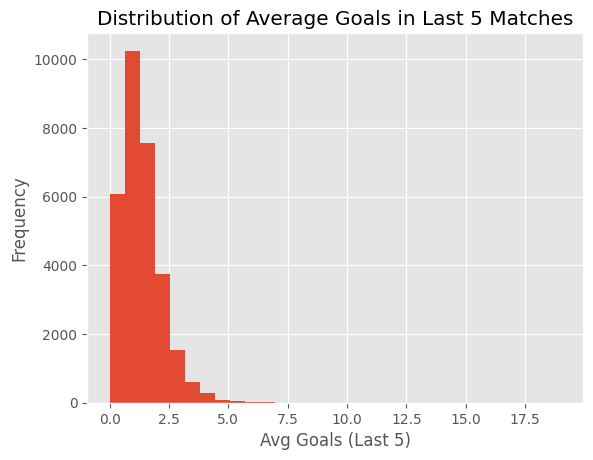

In [31]:
df["avg_goals_last_5"].dropna().hist(bins=30)
plt.title("Distribution of Average Goals in Last 5 Matches")
plt.xlabel("Avg Goals (Last 5)")
plt.ylabel("Frequency")
plt.show()

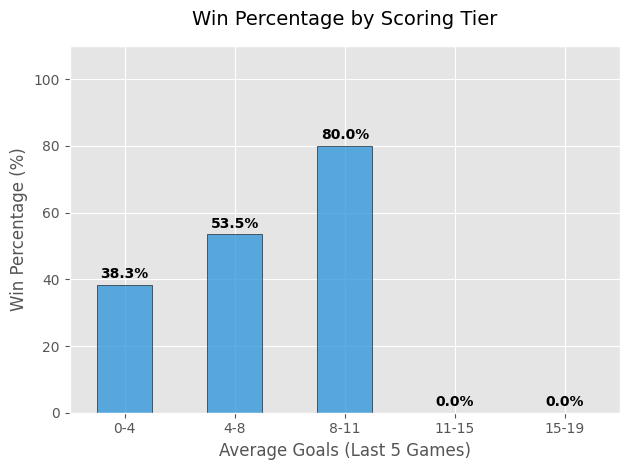

In [36]:
bins = 5
labels = ['0-4', '4-8', '8-11', '11-15', '15-19']
analysis = df.groupby(pd.cut(df["avg_goals_last_5"], bins=bins, labels=labels), observed=False)["win"].mean() * 100

plt.style.use('ggplot')
ax = analysis.plot(kind='bar', color='#3498db', edgecolor='black', alpha=0.8)

# Add '%' sign to the labels on top of bars
for i, val in enumerate(analysis):
    ax.text(i, val + 2, f"{val:.1f}%", ha='center', fontweight='bold')

plt.title('Win Percentage by Scoring Tier', fontsize=14, pad=15)
plt.xlabel('Average Goals (Last 5 Games)', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 110) # Set limit to 110 to give room for the labels
plt.tight_layout()
plt.show()

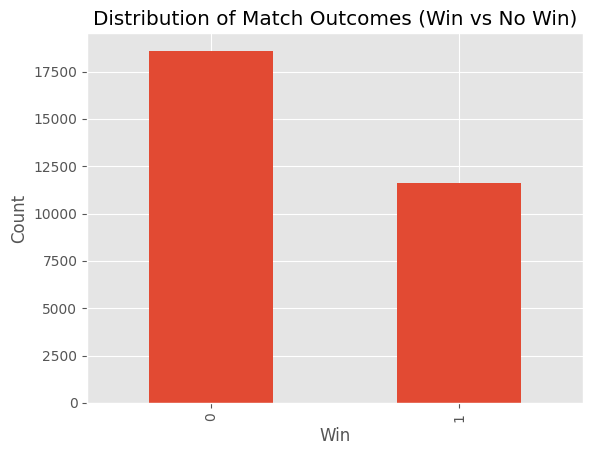

In [30]:
df["win"].value_counts().plot(kind="bar")
plt.title("Distribution of Match Outcomes (Win vs No Win)")
plt.xlabel("Win")
plt.ylabel("Count")
plt.show()

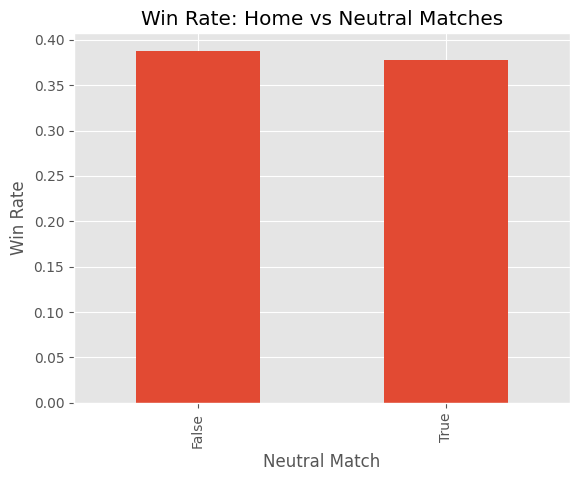

In [34]:
df.groupby("neutral")["win"].mean().plot(kind="bar")
plt.title("Win Rate: Home vs Neutral Matches")
plt.xlabel("Neutral Match")
plt.ylabel("Win Rate")
plt.show()